<a href="https://colab.research.google.com/github/Archi7799/Computer-Vision-Vehicle-classification/blob/main/Rise11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load Data

In [2]:
!pip install pandas --upgrade
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load data
filet = 'train.csv'
df = pd.read_csv(filet)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41152 entries, 0 to 41151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    41152 non-null  object
 1   Y       41152 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 643.1+ KB


,Y
count,41152.000000
mean,1.064347
std,0.899207
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


## 2. Preprocess Data

In [4]:
# Find NaN values in the DataFrame
nan_values = df['Y'].isna().sum()

# Display columns with NaN values and their counts
columns_with_nan = nan_values[nan_values > 0]
print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
[]


In [5]:
# Convert text to lowercase
df['X_processed'] = df['text'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# df['X_processed'].head(10)

In [6]:
#Removing URLs if any
# Define a regex pattern to match URLs
url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    return url_pattern.sub('', text)

# Apply the function to the 'text' column and create a new column 'clean_text'
df['X_processed'] = df['X_processed'].apply(remove_urls)

# df['X_processed'].head(10)

In [7]:
#Removing non word and non white spaces characters(punctuations,symbols or special character)
df['X_processed'] = df['X_processed'].replace(to_replace=r'[^\w\s]', value='', regex=True)
# df['X_processed'].head(10)

In [8]:
#Removing digits
df['X_processed'] = df['X_processed'].replace(to_replace=r'\d', value='', regex=True)
# df['X_processed'].head(10)

In [9]:
#Tokenization
df['X_processed'] = df['X_processed'].apply(word_tokenize)
# df['X_processed'].head(10)

In [10]:
# Remove numbers
stop_words = set(stopwords.words('english'))
df['X_processed'] = df['X_processed'].apply(lambda x: [word for word in x if word not in stop_words])
# df['X_processed'].head(10)

In [11]:
#Stemming
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Apply the function to the 'text' column and create a new column 'stemmed_text'
df['X_processed'] = df['X_processed'].apply(stem_words)

# df['X_processed'].head(10)

In [12]:
# #Lemmatization

# # initialize lemmatizer
# lemmatizer = WordNetLemmatizer()

# # define function to lemmatize tokens
# def lemmatize_tokens(tokens):
#     # convert POS tag to WordNet format
#     def get_wordnet_pos(word):
#         tag = nltk.pos_tag([word])[0][1][0].upper()
#         tag_dict = {"J": wordnet.ADJ,
#                     "N": wordnet.NOUN,
#                     "V": wordnet.VERB,
#                     "R": wordnet.ADV}
#         return tag_dict.get(tag, wordnet.NOUN)

#     # lemmatize tokens
#     lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

#     # return lemmatized tokens as a list
#     return lemmas

# # apply lemmatization function to column of dataframe
# df['X_processed'] = df['X_processed'].apply(lemmatize_tokens)

# df['X_processed'].head(10)

## 3. Visualize data

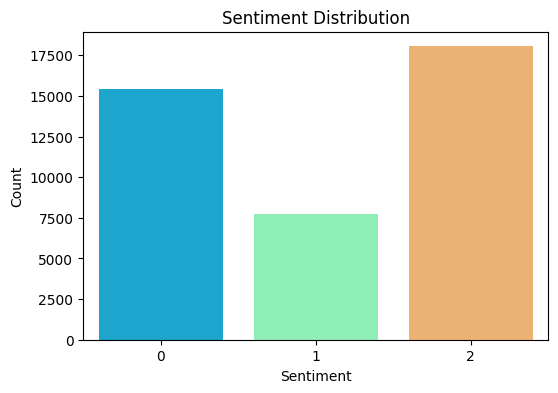

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Y', data=df, palette='rainbow')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 4. Splitting data into training and testing data

In [14]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert text data to TF-IDF feature vectors
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_df['X_processed'].apply(lambda x: " ".join(x)))
Y_train = train_df['Y']

X_test = tfidf_vectorizer.transform(test_df['X_processed'].apply(lambda x: " ".join(x)))
Y_test = test_df['Y']

In [15]:
from imblearn.over_sampling import RandomOverSampler
# Apply RandomOverSampler to balance the output classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)

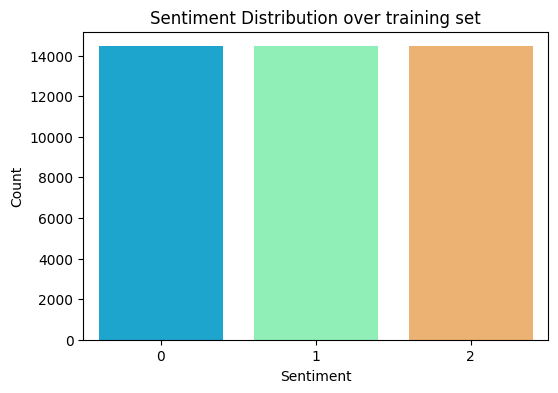

In [16]:
# Convert the resampled CSR matrix to a DataFrame
df_resampled = pd.DataFrame.sparse.from_spmatrix(X_train_resampled)

# Assuming 'Y' is the column representing sentiment in your dataset
df_resampled['Y'] = Y_train_resampled

# Plot the count distribution of sentiments
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df_resampled, palette='rainbow')
plt.title('Sentiment Distribution over training set')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## 5. Model

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [ ]:
# Choosing a pre-trained model
# Initialize classifiers
svm_model = SVC(kernel='linear',C=1)
rf_classifier = RandomForestClassifier(random_state=42)
log_reg_classifier = LogisticRegression(max_iter=1000,random_state=42)
nb_classifier = MultinomialNB()
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train classifiers
svm_model.fit(X_train_resampled, Y_train_resampled)
rf_classifier.fit(X_train_resampled, Y_train_resampled)
log_reg_classifier.fit(X_train_resampled, Y_train_resampled)
nb_classifier.fit(X_train_resampled, Y_train_resampled)
nn_classifier.fit(X_train_resampled, Y_train_resampled)

# Ensemble: Voting Classifier
voting_classifier = VotingClassifier([('svm', svm_model),
                                      ('rf', rf_classifier),
                                      ('lr', log_reg_classifier),
                                      ('nb', nb_classifier),
                                      ('nn', nn_classifier)])

voting_classifier.fit(X_train_resampled, Y_train_resampled)

# Predictions/Testing the model
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
log_reg_predictions = log_reg_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)
nn_predictions = nn_classifier.predict(X_test)
voting_predictions = voting_classifier.predict(X_test)

# Evaluate performance
classifiers = ['Support Vector Machine','Random Forest', 'Logistic Regression', 'Naive Bayes', 'Neural Network', 'Voting Classifier']
predictions = [svm_predictions,rf_predictions, log_reg_predictions, nb_predictions, nn_predictions, voting_predictions]

for clf, pred in zip(classifiers, predictions):
    acc = accuracy_score(Y_test, pred)
    print(f"{clf} Accuracy: {acc:.4f}")

# Calculate and print confusion matrix for Voting Classifier
voting_conf_matrix = confusion_matrix(Y_test, voting_predictions)
print("\nVoting Classifier Confusion Matrix:")
print(voting_conf_matrix)

# Display classification report
voting_class = classification_report(Y_test, voting_predictions)
print("\nClassification Report:")
print(voting_class)

Support Vector Machine Accuracy: 0.8032
Random Forest Accuracy: 0.7716
Logistic Regression Accuracy: 0.7861
Naive Bayes Accuracy: 0.7076
Neural Network Accuracy: 0.7639
Voting Classifier Accuracy: 0.8052

Voting Classifier Confusion Matrix:
[[2502  282  339]
 [ 183 1189  139]
 [ 354  306 2937]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3123
           1       0.67      0.79      0.72      1511
           2       0.86      0.82      0.84      3597

    accuracy                           0.81      8231
   macro avg       0.78      0.80      0.79      8231
weighted avg       0.81      0.81      0.81      8231



## 6. Hyperparameter tuning

In [ ]:
svm_model = SVC(kernel='linear',C=1)
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)
acc = accuracy_score(Y_test, svm_predictions)


In [ ]:
print(f" Accuracy: {acc:.4f}")

 Accuracy: 0.8134


In [ ]:
from sklearn.linear_model import SGDClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of SGDClassifier: 0.7564


In [ ]:
# Initialize and train the SGDClassifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, random_state=42)
sgd_classifier.fit(X_train, Y_train)

# Predict on the test set
sgd_pred = sgd_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, sgd_pred)
print(f"Accuracy of SGDClassifier: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of SGDClassifier: 0.7564


In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

# Create a pipeline with Nystroem transformer and SGDClassifier
nystroem_sgd_pipeline = make_pipeline(
    Nystroem(kernel='rbf', random_state=42, n_components=100),
    SGDClassifier(loss='log', max_iter=1000, random_state=42)
)

# Train the pipeline
nystroem_sgd_pipeline.fit(X_train, Y_train)

# Predict on the test set
nys_pred = nystroem_sgd_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, nys_pred)
print(f"Accuracy of Nystroem + SGDClassifier: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of Nystroem + SGDClassifier: 0.4370


In [ ]:
# # Hyperparameter tuning for SVM classifier
# svm_classifier = SVC(kernel='rbf',random_state=42)

# # Define a grid of hyperparameters to search
# param_grid_svm = {
#     'C': [0.1],  # Regularization parameter
#     'gamma': [10],  # Kernel coefficient
# }

# # Perform Grid Search to find the best hyperparameters
# grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy')
# grid_search_svm.fit(X_train_resampled, Y_train_resampled)

# # Get the best hyperparameters found by Grid Search
# best_params_svm = grid_search_svm.best_params_
# print("Best Hyperparameters for SVM:", best_params_svm)

# # Use the best hyperparameters to create an SVM model
# best_svm_classifier = SVC(**best_params_svm, random_state=42)
# best_svm_classifier.fit(X_train_resampled, Y_train_resampled)

# # Make predictions using the tuned model
# svm_predictions = best_svm_classifier.predict(X_test)

# # Evaluate performance
# accuracy_svm = accuracy_score(Y_test, svm_predictions)
# print(f"Accuracy with Tuned SVM: {accuracy_svm:.4f}")

# # print classification report
# print(classification_report(Y_test, svm_predictions))

In [ ]:
# Hyperparameter tuning for Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, Y_train)
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for RF:", best_params_rf)
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_train, Y_train)
rf_predictions = best_rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(Y_test, rf_predictions)
print(f"Accuracy with Tuned Random Forest: {accuracy_rf:.4f}")

Best Hyperparameters for RF: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy with Tuned Random Forest: 0.7732


In [ ]:
# Hyperparameter tuning for Logistic Regression
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)
param_grid_log_reg = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_log_reg = GridSearchCV(estimator=log_reg_classifier, param_grid=param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, Y_train)
best_params_log_reg = grid_search_log_reg.best_params_
best_log_reg_classifier = LogisticRegression(**best_params_log_reg, max_iter=1000, random_state=42)
best_log_reg_classifier.fit(X_train, Y_train)
log_reg_predictions = best_log_reg_classifier.predict(X_test)
accuracy_log_reg = accuracy_score(Y_test, log_reg_predictions)
print(f"Accuracy with Tuned Logistic Regression: {accuracy_log_reg:.4f}")

Accuracy with Tuned Logistic Regression: 0.8168


In [ ]:
print("Best Hyperparameters for LR:", best_params_log_reg)

Best Hyperparameters for LR: {'C': 10.0, 'solver': 'liblinear'}


In [ ]:

# Hyperparameter tuning for Naive Bayes
nb_classifier = MultinomialNB()
param_grid_nb = {
    'alpha': [0.1, 1.0, 10.0],
}

grid_search_nb = GridSearchCV(estimator=nb_classifier, param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, Y_train)
best_params_nb = grid_search_nb.best_params_
best_nb_classifier = MultinomialNB(**best_params_nb)
best_nb_classifier.fit(X_train, Y_train)
nb_predictions = best_nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(Y_test, nb_predictions)
print(f"Accuracy with Tuned Naive Bayes: {accuracy_nb:.4f}")

Accuracy with Tuned Naive Bayes: 0.6520


In [ ]:
# Hyperparameter tuning for Neural Network (MLPClassifier)
nn_classifier = MLPClassifier(max_iter=1000, random_state=42)
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
}

grid_search_nn = GridSearchCV(estimator=nn_classifier, param_grid=param_grid_nn, cv=5, scoring='accuracy')
grid_search_nn.fit(X_train, Y_train)
best_params_nn = grid_search_nn.best_params_
best_nn_classifier = MLPClassifier(**best_params_nn, max_iter=1000, random_state=42)
best_nn_classifier.fit(X_train, Y_train)
nn_predictions = best_nn_classifier.predict(X_test)
accuracy_nn = accuracy_score(Y_test, nn_predictions)
print(f"Accuracy with Tuned Neural Network: {accuracy_nn:.4f}")